Question 1: What is Simple Linear Regression?


It is a statistical technique used to model the relationship between two variables.
One variable is the independent (predictor) variable, and the other is the dependent (outcome) variable.
The model fits a straight line (linear equation) to the data points to describe how the dependent variable changes as the independent variable changes.



Question 2: What are the key assumptions of Simple Linear Regression?



Linearity: The relationship between the independent and dependent variable is linear.
Independence: Observations (and errors) are independent of each other.
Homoscedasticity: The variance of the residuals (errors) is constant across all levels of the independent variable.
Normality: The residuals are normally distributed.
No Perfect Multicollinearity: In simple linear regression, this is less relevant since there is only one predictor, but in multiple regression, predictors should not be perfectly correlated.



Question 3: What is heteroscedasticity, and why is it important to address in regression models?



Definition: Heteroscedasticity occurs when the variance of the residuals is not constant across all values of the independent variable; residuals may fan out or form patterns.
Importance:
It violates the assumption of constant variance (homoscedasticity).
Leads to inefficient and biased estimates of standard errors.
Affects the validity of hypothesis tests and confidence intervals.
Can be detected by residual plots or tests like the Goldfeld-Quandt test.
Addressing it may involve data transformation or adding terms to the model.



Question 4: What is Multiple Linear Regression?



An extension of simple linear regression.
Models the relationship between one dependent variable and two or more independent variables.
Assumes a linear relationship between the dependent variable and each independent variable.
Requires checking assumptions such as linearity, normality, no multicollinearity, homoscedasticity, and independence of residuals.
Multicollinearity among predictors can be assessed using correlation matrices, Variance Inflation Factor (VIF), and tolerance values.



Question 5: What is polynomial regression, and how does it differ from linear regression?



Polynomial regression models the relationship between the independent and dependent variables as an nth-degree polynomial (e.g., quadratic, cubic).
Allows for curved (non-linear) relationships between variables.
Unlike linear regression, which fits a straight line, polynomial regression can fit curves to better capture complex patterns in data.
It is still a linear model in terms of parameters but nonlinear in terms of the predictor variable(s).

Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

  ● X = [1, 2, 3, 4, 5]

  ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
  
 Plot the regression line over the data points.


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

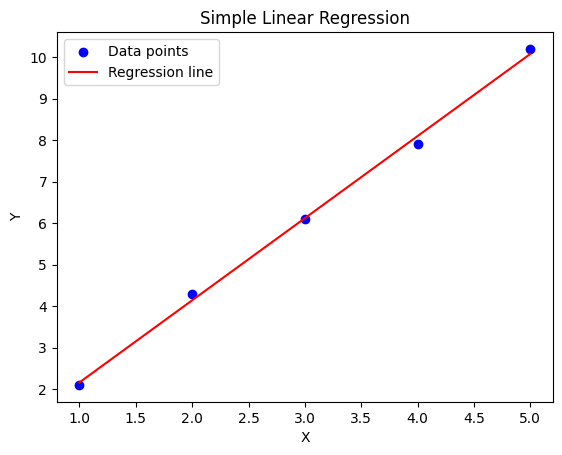

In [ ]:
x = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)

# Plotting
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
 ● Rooms = [2, 3, 3, 4]
 ● Price = [250000, 300000, 320000, 370000]
 Check for multicollinearity using VIF and report the results.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)
# Define independent variables (features) and dependent variable (target)
X = df[['Area', 'Rooms']]
y = df['Price']
# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)
# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
  print(f"  {feature}: {coef}")
# Calculate VIF for each feature
# Add constant column for intercept (required by statsmodels)
X_with_const = X.copy()
X_with_const['Intercept'] = 1
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)


Intercept: 103157.89473684214
Coefficients:
  Area: 63.15789473684211
  Rooms: 34736.842105263146

Variance Inflation Factor (VIF) for each feature:
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


Question 8: Implement polynomial regression on the following data:
 ● X = [1, 2, 3, 4, 5] 3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.


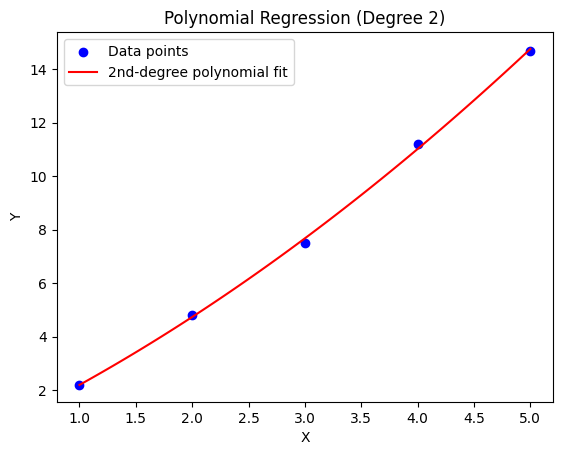

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Generate predictions for plotting smooth curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

# Plot data points and polynomial regression curve
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X_plot, Y_plot, color='red', label='2nd-degree polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:
 ● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
 Assess heteroscedasticity by examining the spread of residuals.


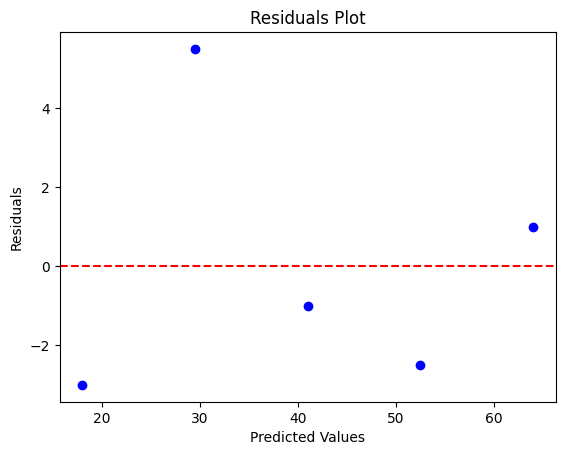

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals vs predicted values
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

To build a robust regression model for predicting house prices while addressing heteroscedasticity and multicollinearity:

1. Detect and Confirm Issues
Heteroscedasticity: Check residual plots (residuals vs. fitted values). If the variance of residuals increases or decreases with fitted values, heteroscedasticity is present.
Multicollinearity: Calculate Variance Inflation Factor (VIF) for each predictor. VIF values above 5 or 10 indicate multicollinearity.
2. Addressing Heteroscedasticity
Transform the dependent variable: Apply transformations like log, square root, or Box-Cox to stabilize variance.

For example, if $ y $ is the house price, use: $ y' = \log(y) $

Weighted Least Squares (WLS): Assign weights inversely proportional to the variance of residuals to give less weight to observations with higher variance.

Robust Standard Errors: Use heteroscedasticity-consistent standard errors (e.g., White’s standard errors) to get valid inference without changing the model.

3. Addressing Multicollinearity
Remove or combine correlated variables: If two features are highly correlated (e.g., number of rooms and area), consider removing one or combining them (e.g., rooms per area).

Principal Component Analysis (PCA): Transform correlated features into uncorrelated components and use these components as predictors.

Regularization techniques:

Ridge Regression: Adds L2 penalty to shrink coefficients of correlated variables.
Lasso Regression: Adds L1 penalty to perform variable selection and shrinkage.

4. Model Validation and Diagnostics
Cross-validation: Use k-fold cross-validation to ensure the model generalizes well.
Check residuals again: After adjustments, plot residuals to confirm heteroscedasticity is reduced.
Check VIF again: Confirm multicollinearity is mitigated.